### **Does Paying for a dating site actually work?**

---



### **Introduction**
  In a modern world where many people are failing to find "True Love" it is becoming harder and harder to find the fastest way. It is becoming more common place for people to turn to new methods. One such new method is using dating apps such as Hinge, Tinder, Facebook and others. Some of the apps offer subscription services to showcase their paying members. The goal of this investigation is to see if paying helps individuals increase their potential in bringing potential "true love" opportunities.  The scope of this investigation will focus on the dating app Lovoo with over 23 million users it provides a nice dataset for analysis.


### **Description of the data**
  The data set in the investigation is Females ages 19 - 27 located primarily in Europe with a few data sets from the Eastern United States. The data covered information with a variety of paremeters that included Location, Distance between individuals, Photos in profile, clicks per profile, and a variety of other data to track movement accross the platform. The data set comes from https://www.kaggle.com/datasets/jmmvutu/dating-app-lovoo-user-profiles?select=lovoo_v3_users_instances.csv. The main limitation I see is it is primarily limited to Europe. The implication would be inferring the data to be universal between locations.  

### **The Statistical Methods**

Looking at the business model one could think the more subscribers the more money the application designers and owners would make. It would be easy to deduce that paying for the highlighted profile would increase ones opportunities to find love. I hypothesized that it does imply increase ones chances. I called this data set data_new, I then sorted through what other data may or may not play a factor I converted Trues and Falses for connection tracking into 1 and 0 and called the new data table data_new2. The final thing I did was eliminate the NAN values and called this data set date_new3. It is that set the I applied the tests to. I will be using flirtInterests_chat as the way to track the interest opportunity. I used the counts_profileVisits and the counts_pictures data sets as a way to track which catergory individuals were in. I began with a histogram to look for overall trends in the data sets with a hue of flirtInterest_chat to see if the user was motivated by an increase in picture quantity as opposed to no change in the data regardless of picture count. The second method I used to look for coorerrlation was the OLS model to look for the P value in an attempt to see correlation between counts_profilevisits and the counts_pictures data sets again using the Hue of flirtInterest_chat data set. I will breakdown both the OLS regression results for counts_profilevisits vs flirtInteres_chat, and counts_pictures vs flirtInterest_chat data sets. 

In [3]:
import pandas as pd
date = 'https://raw.githubusercontent.com/BrandonGinos/data/main/lovoo_v3_users_api-results.csv'
date = pd.read_csv('https://raw.githubusercontent.com/BrandonGinos/data/main/lovoo_v3_users_api-results.csv')


In [4]:
date_new = date[['gender','age','counts_profileVisits','counts_pictures','flirtInterests_chat','isHighlighted'] ]
date_new2 = date_new.astype({'flirtInterests_chat': int })  
date_new2
date_new3=date_new2.dropna().reset_index(drop=True)
date_new3

,gender,age,counts_profileVisits,counts_pictures,flirtInterests_chat,isHighlighted
0,F,25,8279,4,1,0
1,F,22,663,5,1,0
2,F,21,1369,4,0,0
3,F,20,22187,3,1,0
4,F,21,35262,12,1,0
...,...,...,...,...,...,...
3987,F,22,1003,6,0,0
3988,F,24,6890,7,0,0
3989,F,20,1157,4,0,0
3990,F,20,1157,4,0,0


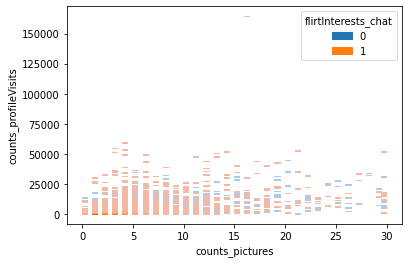

In [5]:
import seaborn as sns
sns.histplot(x='counts_pictures', y='counts_profileVisits', hue = 'flirtInterests_chat', data = date_new3)

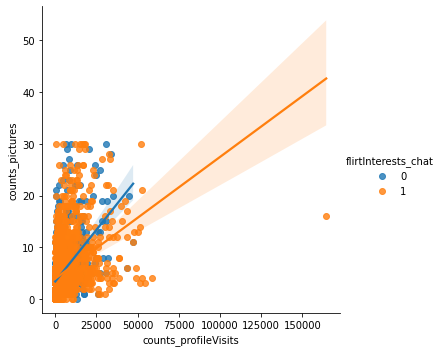

In [12]:
sns.lmplot(y='counts_pictures',x='counts_profileVisits', hue = 'flirtInterests_chat', data = date_new3)

In [13]:
from statsmodels.formula.api import ols
date_model = ols("counts_profileVisits ~ isHighlighted", data=date_new3).fit()
date_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     counts_profileVisits   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     1.385
Date:                  Fri, 03 Jun 2022   Prob (F-statistic):              0.239
Time:                          16:55:53   Log-Likelihood:                -40918.
No. Observations:                  3992   AIC:                         8.184e+04
Df Residuals:                      3990   BIC:                         8.185e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3691.5518    108.976     33.875      0.000    3477.898    3905.206
isHighlighted  1181.9162   1004.333      1.177      0.239    -787.138    3150.970
==============================================================================
Omnibus:                     4842.315   Durbin-Watson:                   1.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1322590.139
Skew:                           6.155   Prob(JB):                         0.00
Kurtosis:                      91.317   Cond. No.                         9.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from statsmodels.formula.api import ols
date_model = ols("counts_pictures ~ isHighlighted", data=date_new3).fit()
date_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        counts_pictures   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.247
Date:                Fri, 03 Jun 2022   Prob (F-statistic):            0.00713
Time:                        16:55:59   Log-Likelihood:                -11593.
No. Observations:                3992   AIC:                         2.319e+04
Df Residuals:                    3990   BIC:                         2.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7660      0.070     67.776      0.000       4.628       4.904
isHighlighted     1.7446      0.648      2.692      0.007       0.474       3.015
==============================================================================
Omnibus:                     2057.661   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13770.683
Skew:                           2.415   Prob(JB):                         0.00
Kurtosis:                      10.711   Cond. No.                         9.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Results**
The results of the tests are as follows.

### **Conclusion**
After testing the data against each other looking for corelation the data suggests that we fail to reject the null Hypothesis that there is no significant change in the data between profile pictures quantity and profile visits.

When comparing quantity of profile visits between highlighted profiles and standard profiles there was a very heavy positive skew of 6.155 and a p value of .239. However, when the tests between Picture counts in profile and the highlighted visits are compared their is also a positive skew much much less at 2.415 and a p value of 0.007 compared to the .239 on the first test. below is a scaterplot with two projected lines showing some correlation in the data, but due to the nature of the data it is unlikely that reasonable projections could be made past 50,000 page visits as suggested by the data. This lack of correlation can also be evidenced in the histogram that doesn't really show a traditional bell curv but rather scattered accross the data section.

There is are a couple obvious limitations in the data set, first is location, although it includes at least 1 sample from New York the data to conclude that it could be transferalble across the various cultures and geographical locations would be highly questioned. The other limitation is the limited quantity of Highlighted individual profiles, the count of only 47 is difficualt to assertain a large enough sample set when compared with the 3,992 sampled.

New questions that would need more data would be what seperates the highlighted form the non highlighted that could affect the correlation, size, color, frequency of recomendation. It would also be interesting to see a breakdown of facial structures or profile specific attributes that inspire a user to invite to chat. For example, does pictures with nature, or hiking, animals, kids among others inspire more likes.  
